In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

2024-06-16 16:00:22.215547: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 16:00:22.215672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 16:00:22.314049: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test,y_test)=datasets.cifar10.load_data()
x_train.shape
#50000 image,pixel(32X32) ,3 indicates(RGB)...

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:7]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2]], dtype=uint8)

In [6]:
y_test.shape

(10000, 1)

In [7]:
labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
labels[y_test[0][0]]

'cat'

In [9]:
def train_f(x,y,index):
    plt.figure(figsize=(14,2))
    plt.imshow(x[index])
    plt.xlabel(labels[y[index][0]])# here y_train is a 2D array and in every row,there is only one element,thats why i am passing [index][0]
    

here another solution could be applicable:
i.converting y_train value in 1D array form 2D
ii. then pass labels[y[index]].

for converting in 1D array:
y_train = y_train.reshape(-1,)

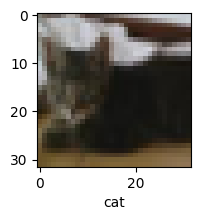

In [10]:
train_f(x_train,y_train,9)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

# Normalizing the training data

since the range of RGB is 0->255 we need to divide the train data by 255

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

CNN

In [13]:
cnn= models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    

    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(x_train, y_train, epochs=12)


Epoch 1/12
  80/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1562 - loss: 2.2527

I0000 00:00:1718553645.100424      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718553645.117042      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3662 - loss: 1.7422
Epoch 2/12
  83/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5434 - loss: 1.2797

W0000 00:00:1718553649.730054      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5628 - loss: 1.2328
Epoch 3/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6235 - loss: 1.0769
Epoch 4/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6593 - loss: 0.9773
Epoch 5/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6839 - loss: 0.9165
Epoch 6/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7071 - loss: 0.8491
Epoch 7/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7162 - loss: 0.8173
Epoch 8/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7281 - loss: 0.7845
Epoch 9/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7399 - loss: 0.7541
Epoch 10/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7505 - loss: 0.7162
Epoch 11/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7619 - loss: 0.6896
Epoch 12/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7632 - loss: 0.6756


In [16]:
cnn.evaluate(x_test,y_test)

 96/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.9102

W0000 00:00:1718553688.279806      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6955 - loss: 0.9293


W0000 00:00:1718553689.133774      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.9423222541809082, 0.6899999976158142]

In [17]:
#y_test = y_test.reshape(-1,)
#y_test

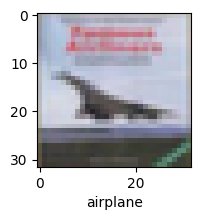

In [18]:
train_f(x_test, y_test,3)

In [19]:
y_predict=cnn.predict(x_test)
y_predict[:4]

108/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1718553690.542916      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


W0000 00:00:1718553691.242666      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[6.32589124e-03, 6.22406442e-05, 1.73660908e-02, 9.06928837e-01,
        1.48730542e-04, 6.46082610e-02, 3.39447497e-03, 1.03831255e-04,
        9.88342101e-04, 7.32990811e-05],
       [2.17394587e-02, 8.43722932e-03, 8.27587137e-05, 3.24205735e-06,
        2.24538417e-06, 6.34802078e-08, 2.92647400e-07, 1.33378180e-07,
        9.69439209e-01, 2.95403646e-04],
       [1.11998022e-01, 5.28554797e-01, 5.34514710e-03, 1.37712033e-02,
        7.62689812e-03, 1.56644371e-03, 8.52798461e-04, 5.39955264e-03,
        3.11822057e-01, 1.30631439e-02],
       [8.99875164e-01, 2.79207178e-03, 2.27366164e-02, 1.11656776e-03,
        3.75519070e-04, 1.16750325e-05, 8.20108596e-03, 1.60891577e-05,
        6.47898391e-02, 8.52688536e-05]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:5]

[3, 8, 1, 0, 6]

In [21]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

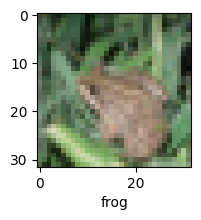

In [22]:
train_f(x_test, y_test,4)

In [23]:
labels[y_classes[4]]

'frog'